# Imports

In [1]:
import os
import networkx as nx
print("networkx version",nx.__version__)
import pandas as pd
print("pandas version",pd.__version__)
import numpy as np
print("numpy version",np.__version__)
import matplotlib
print("matplotlib version",matplotlib.__version__)
import matplotlib.pyplot as plt

# IPython usability improvements:
import warnings
warnings.filterwarnings('ignore')
from IPython.core.display import display, HTML
display(HTML("<style>.container { width:95% !important; }</style>"))
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "last_expr"
pd.set_option('display.expand_frame_repr', False)

networkx version 2.4
pandas version 1.0.2
numpy version 1.18.1
matplotlib version 3.2.0


# Import source data

In [2]:
xls = pd.ExcelFile("data_warehouse_dataset_network_example.xlsx")

In [3]:
print('Import lineage nodes')
# list of all the nodes
lineage_nodes = pd.read_excel(xls, 'nodes')
lineage_nodes

Import lineage nodes


,path,entity,entity_name,entity_dataset_name,cid_class,modified_on
0,/client_info/clients_accounts,source,client info source,clients_accounts,A,2020-11-10 10:42:00.000
1,/client_info/clients_transactions,source,client info source,clients_transactions,B,2019-11-11 10:42:00.000
2,/real_estate/real_estate_prices,source,real estate source,real_estate_prices,C,2020-11-01 10:42:00.000
3,/real_estate/real_estate_addresses,source,real estate source,real_estate_addresses,A,2020-11-01 10:42:00.000
4,/loans/loan_affordability,project,loans project,loan_affordability,NaN,2020-11-10 10:42:00.000
5,/loans/loan_score,project,loans project,loan_score,NaN,2020-11-10 10:42:00.000
6,/loans/loan_interests,project,loans project,loan_interests,NaN,2020-11-10 10:42:00.000
7,/market_study/competitors_prices,project,market study project,competitors_prices,NaN,2020-11-10 10:42:00.000
8,/market_study/market_insights,project,market study project,market_insights,NaN,2020-11-18 10:41:59.995
9,/market_study/market_forecasts,project,market study project,market_forecasts,NaN,2020-11-19 10:41:59.995


In [4]:
print('Import lineage edges')
# list of all the edges
lineage_edges = pd.read_excel(xls, 'edges')
lineage_edges

Import lineage edges


,parent,child
0,/client_info/clients_accounts,/client_info/clients_transactions
1,/client_info/clients_accounts,/loans/loan_affordability
2,/real_estate/real_estate_addresses,/real_estate/real_estate_prices
3,/real_estate/real_estate_addresses,/loans/loan_affordability
4,/loans/loan_score,/loans/loan_affordability
5,/loans/loan_interests,/loans/loan_score
6,/client_info/clients_accounts,/market_study/competitors_prices
7,/client_info/clients_transactions,/market_study/market_insights
8,/client_info/clients_accounts,/market_study/market_forecasts
9,/market_study/market_insights,/market_study/market_forecasts


# Build graph
```python
class DiGraph(incoming_graph_data=None, **attr)
```
https://networkx.org/documentation/stable/reference/classes/digraph.html<br>
Base class for directed graphs.<br>
A DiGraph stores nodes and edges with optional data, or attributes.<br>
DiGraphs hold directed edges. Self loops are allowed but multiple (parallel) edges are not.<br>
Nodes can be arbitrary (hashable) Python objects with optional key/value attributes. By convention ``None`` is not used as a node.<br>
Edges are represented as links between nodes with optional key/value attributes.<br>

In [5]:
# use Directional Graph as all the edges are (parent-->child) oriented 
dg = nx.DiGraph()

## Loop over nodes to fill the graph

In [6]:
print('Loop over nodes')

# loop over all the nodes using the pandas itertuples method
for node_idx, node in enumerate(lineage_nodes.itertuples()):
    
    # add node with attributes
    dg.add_node(node.path,
                entity = node.entity,
                entity_name = node.entity_name,
                entity_dataset_name = node.entity_dataset_name,
                cid_class = node.cid_class
               )
    
    # printout example node
    if node_idx == 0:
        print("\nnode example")
        print("node id (path):",node.path,
              "\nnode attributes:",dg.nodes(data=True)[node.path])

print("\ndone")    

Loop over nodes

node example
node id (path): /client_info/clients_accounts 
node attributes: {'entity': 'source', 'entity_name': 'client info source', 'entity_dataset_name': 'clients_accounts', 'cid_class': 'A'}

done


## Loop over edges

In [7]:
print('Loop over edges')

for edge in lineage_edges.itertuples():
    # add edges to the graph
    dg.add_edge(edge.parent,edge.child)

print("done")

Loop over edges
done


## Count final number of nodes and edges

In [8]:
nodes_list = np.array(list(dg.nodes()))
print("number of nodes:",len(nodes_list))
edges_list = np.array(list(dg.edges()))
print("number of edges:",len(edges_list))

number of nodes: 10
number of edges: 10


## Plot graph

{'/client_info/clients_accounts': Text(-0.2325374031929439, -0.07631492163132195, '/client_info/clients_accounts'),
 '/client_info/clients_transactions': Text(-0.06933679977457383, -0.5751908295043862, '/client_info/clients_transactions'),
 '/real_estate/real_estate_prices': Text(1.0, -0.1323750983608932, '/real_estate/real_estate_prices'),
 '/real_estate/real_estate_addresses': Text(0.4766666717558506, 0.3776983720969446, '/real_estate/real_estate_addresses'),
 '/loans/loan_affordability': Text(-0.049516771739822364, 0.8862588229029545, '/loans/loan_affordability'),
 '/loans/loan_score': Text(-0.028020276991000476, 0.7289986150545391, '/loans/loan_score'),
 '/loans/loan_interests': Text(-0.006002909947204292, 0.5637582734625155, '/loans/loan_interests'),
 '/market_study/competitors_prices': Text(-0.777514995153484, -0.20380013039346273, '/market_study/competitors_prices'),
 '/market_study/market_insights': Text(-0.13346062529680175, -0.7123676559283154, '/market_study/market_insights'

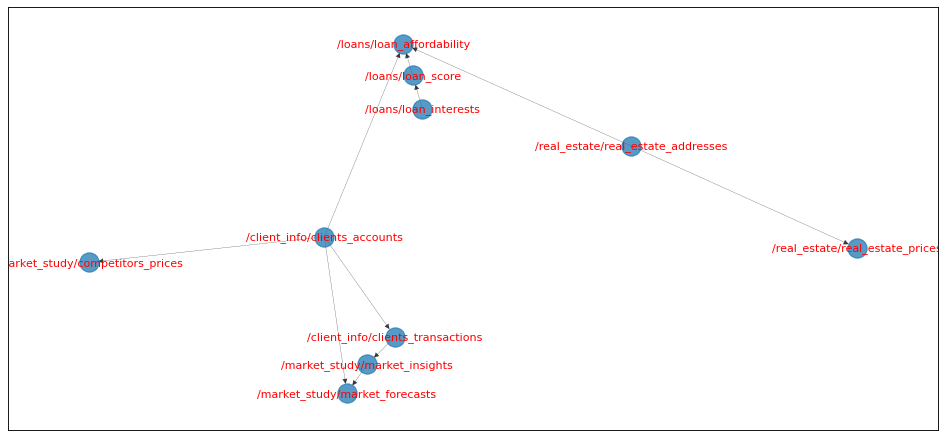

In [19]:
plt.figure(num=None, figsize=(15,7), dpi=80, facecolor='w', edgecolor='k')

# Position nodes using Fruchterman-Reingold force-directed algorithm.
# The algorithm simulates a force-directed representation of the network treating edges as springs holding nodes close, 
# while treating nodes as repelling objects, sometimes called an anti-gravity force. 
# Simulation continues until the positions are close to an equilibrium.
# cfr https://networkx.org/documentation/stable//reference/generated/networkx.drawing.layout.spring_layout.html
pos = nx.spring_layout(dg, k=2, iterations=500)

labels = {}    
for node in dg.nodes():
    labels[node] = node

nx.draw_networkx_nodes(dg, pos, width=0.125, alpha=0.75)
nx.draw_networkx_edges(dg, pos, width=0.25, alpha=0.75)
nx.draw_networkx_labels(dg, pos, labels, font_size=10, font_color='r')

## Create dataset listing all the connections for each dataset to all the others

In [10]:
print("Create dataset listing all the connections for each dataset to all the others")

flattened_lineage = pd.DataFrame(columns=[
    "parent_path",
    "parent_entity",
    "parent_entity_name",
    "parent_entity_dataset_name",
    "parent_cid_class",
    "descendant_path",
    "descendant_entity",
    "descendant_entity_name",
    "descendant_entity_dataset_name",
    "descendant_cid_class",
    "direct_link"
])

for i, node in enumerate(nodes_list):
    
    # retrieve node attributes
    node_attr = dg.nodes(data=True)[node]
    # retrieve all the node descendants, both DIRECT and INDIRECT
    # requires a directed acyclic graph (i.e. no internal loops)
    descendant_nodes = nx.algorithms.dag.descendants(dg, node)
    # retrieve all the node that DIRECT descendants
    successors_nodes = dg.successors(node)
    
    # for each node, loop over all the descendants
    for j, descendant_node in enumerate(descendant_nodes):
        
        # retrieve descendand attributes
        descendant_node_attr = dg.nodes(data=True)[descendant_node]
        # create parent-descendant flattened entry
        flattened_lineage_dict = {'parent_path': node,
                                  'parent_entity': node_attr["entity"],
                                  'parent_entity_name': node_attr["entity_name"],
                                  'parent_entity_dataset_name': node_attr["entity_dataset_name"],
                                  'parent_cid_class': node_attr["cid_class"],
                                  'descendant_path': descendant_node,
                                  'descendant_entity': descendant_node_attr["entity"],
                                  'descendant_entity_name': descendant_node_attr["entity_name"],
                                  'descendant_entity_dataset_name': descendant_node_attr["entity_dataset_name"],
                                  'descendant_cid_class': descendant_node_attr["cid_class"],
                                  'direct_link': descendant_node in successors_nodes # check if the descendant is also a successor (i.e. DIRECT descendant)
                                  }
        # fill the flattened entry in the dataframe
        flattened_lineage = flattened_lineage.append(flattened_lineage_dict, ignore_index=True)

flattened_lineage

Create dataset listing all the connections for each dataset to all the others


,parent_path,parent_entity,parent_entity_name,parent_entity_dataset_name,parent_cid_class,descendant_path,descendant_entity,descendant_entity_name,descendant_entity_dataset_name,descendant_cid_class,direct_link
0,/client_info/clients_accounts,source,client info source,clients_accounts,A,/loans/loan_affordability,project,loans project,loan_affordability,NaN,True
1,/client_info/clients_accounts,source,client info source,clients_accounts,A,/client_info/clients_transactions,source,client info source,clients_transactions,B,False
2,/client_info/clients_accounts,source,client info source,clients_accounts,A,/market_study/competitors_prices,project,market study project,competitors_prices,NaN,False
3,/client_info/clients_accounts,source,client info source,clients_accounts,A,/market_study/market_forecasts,project,market study project,market_forecasts,NaN,False
4,/client_info/clients_accounts,source,client info source,clients_accounts,A,/market_study/market_insights,project,market study project,market_insights,NaN,False
5,/client_info/clients_transactions,source,client info source,clients_transactions,B,/market_study/market_forecasts,project,market study project,market_forecasts,NaN,False
6,/client_info/clients_transactions,source,client info source,clients_transactions,B,/market_study/market_insights,project,market study project,market_insights,NaN,False
7,/real_estate/real_estate_addresses,source,real estate source,real_estate_addresses,A,/loans/loan_affordability,project,loans project,loan_affordability,NaN,True
8,/real_estate/real_estate_addresses,source,real estate source,real_estate_addresses,A,/real_estate/real_estate_prices,source,real estate source,real_estate_prices,C,False
9,/loans/loan_score,project,loans project,loan_score,NaN,/loans/loan_affordability,project,loans project,loan_affordability,NaN,True


### Query for paths connecting pair of nodes

```python
nx.single_source_shortest_path_length(G, source, cutoff=None)[source]
```
Compute the shortest path lengths from source to all reachable nodes.

In [11]:
pd.set_option('display.max_colwidth', -1)

print("Start computing all the shortest paths")
all_paths_dict = {}

# prepare a dataframe which contains the shortest path for each pair of nodes on the graph
output_all_paths_df = pd.DataFrame(columns=['initial_node',
                                            'final_node',
                                            'shortest_path'
                                           ])
imax = len(nodes_list)
for i, node_in in enumerate(nodes_list):
    
    # retrieve the shortest path lengths from node to all other reachable nodes, in ordered dictionary form
    node_paths_to_all_nodes = nx.single_source_shortest_path(dg,node_in)

    # loop over each reachable nodes' shortest path
    for node_path_to_single_node in node_paths_to_all_nodes.keys():
        
        # skip itself
        if len(node_paths_to_all_nodes[node_path_to_single_node])<2:
            continue
        
        # iteratively create a shortest path string
        shortest_path_string = ""
        for node in node_paths_to_all_nodes[node_path_to_single_node]:
            shortest_path_string = shortest_path_string + " ---> " + node

        # create the entry for the dataframe
        values_to_add = {'initial_node': node_in,
                         'final_node': node_path_to_single_node,
                         'shortest_path': shortest_path_string.lstrip(" ---> ")
                         }
        row_to_add = pd.Series(values_to_add)
        output_all_paths_df = output_all_paths_df.append(row_to_add, ignore_index=True)

# print the newly created dataframe
output_all_paths_df        

Start computing all the shortest paths


,initial_node,final_node,shortest_path
0,/client_info/clients_accounts,/client_info/clients_transactions,/client_info/clients_accounts ---> /client_info/clients_transactions
1,/client_info/clients_accounts,/loans/loan_affordability,/client_info/clients_accounts ---> /loans/loan_affordability
2,/client_info/clients_accounts,/market_study/competitors_prices,/client_info/clients_accounts ---> /market_study/competitors_prices
3,/client_info/clients_accounts,/market_study/market_forecasts,/client_info/clients_accounts ---> /market_study/market_forecasts
4,/client_info/clients_accounts,/market_study/market_insights,/client_info/clients_accounts ---> /client_info/clients_transactions ---> /market_study/market_insights
5,/client_info/clients_transactions,/market_study/market_insights,/client_info/clients_transactions ---> /market_study/market_insights
6,/client_info/clients_transactions,/market_study/market_forecasts,/client_info/clients_transactions ---> /market_study/market_insights ---> /market_study/market_forecasts
7,/real_estate/real_estate_addresses,/real_estate/real_estate_prices,/real_estate/real_estate_addresses ---> /real_estate/real_estate_prices
8,/real_estate/real_estate_addresses,/loans/loan_affordability,/real_estate/real_estate_addresses ---> /loans/loan_affordability
9,/loans/loan_score,/loans/loan_affordability,/loans/loan_score ---> /loans/loan_affordability
